# Determinant QMC data visualization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_palette("Blues_r")
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

## Load simulation data

In [4]:
system = '1d-chain-pbc'
N = 2
BETA = 2
U = 4
MU = 0

simDir = '../data/' + system + '/N' + str(N)\
+ '-BETA' + str(BETA) + '-U' + str(U) + '-MU' + str(MU)
plotDir = '../plots/' + system + '/N' + str(N)\
+ '-BETA' + str(BETA) + '-U' + str(U) + '-MU' + str(MU)

## Spin-spin correlations on the lattice

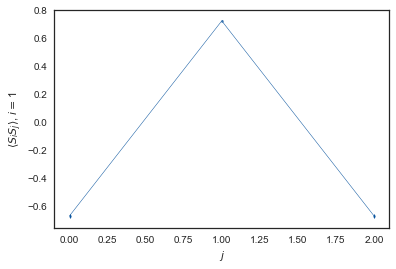

In [7]:
magCorr = np.loadtxt(simDir + '/EqTimeSzCorrelations.csv', skiprows = 1, delimiter = ',')
magCorrErr = np.loadtxt(simDir + '/EqTimeSzCorrelationsError.csv', skiprows = 1, delimiter = ',')

plt.errorbar( N - np.arange(N + 1),\
             np.hstack((magCorr[int(N/2), :], magCorr[int(N/2), 0])), linewidth = 0.5,\
            marker = 'o', markersize = 0.5, markeredgewidth = 2,\
             yerr=np.hstack((magCorrErr[int(N/2), :], magCorrErr[int(N/2), 0])),
            elinewidth = 1)
plt.xlabel(r'$j$')
plt.ylabel(r'$\left\langle S_i S_j \right\rangle$, $i = $' + str(int(N/2)))
plt.savefig(plotDir + '/magCorr.png', dpi = 350)

## Fourier transform to obtain the structure factor    

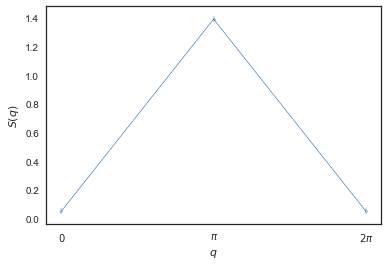

In [8]:
f,ax=plt.subplots(1)

n_qs = N
qMax = 2*np.pi
qs = np.arange(0, qMax + qMax/n_qs, qMax/n_qs)
S = np.zeros(n_qs+1)
Serr = np.zeros(n_qs+1)

for idx, q in enumerate(qs):
    for x in range(N):
        for y in range(N):
            S[idx] += np.cos((x - y) * q ) * magCorr[x, y]
            Serr[idx] += abs(np.cos((x - y) * q ) * magCorrErr[x, y])

S /=  N
Serr /= N

ax.errorbar(qs/2/np.pi, S, linewidth = 0.5, markersize = 0.3, marker = 'o',\
           markeredgewidth = 2, yerr=Serr, elinewidth = 0.4)
ax.set_xlabel(r'$q$')
ax.set_ylabel(r'$S(q)$')
ax.set_xticks([0, .5, 1])
ax.set_xticklabels([r"$0$", r"$\pi$" , r"$2\pi$"])
plt.savefig(plotDir + '/S(q).png', dpi = 350)